In [2]:
import numpy as np
from qutip import *

In [3]:
# # Define hamiltonian

# from mpmath import *

# # gamma_0 = 0.5
# # lam = 0.6


# #Define s(t) as a hamiltonain coefficient
# # def s(t,args):
# #     gamma_0 = args['gamma_0']
# #     lam = args['lam']
# #     return np.imag(gamma_0/(np.sqrt(2-(2*gamma_0)/(lam*np.tanh(((lam*t)/2)*np.sqrt(1-2*gamma_0/lam))))))
# args={'gamma_0': 0.9, 'lam': 100}

# #Second Trial 
# def s(t,args):
#     gamma_0 = args['gamma_0']
#     lam = args['lam']

#     # Denominator Decomposition

#     coth_term = 1/np.tanh(((lam*t)/2)*np.sqrt(1-2*gamma_0/lam))
#     deno = np.sqrt(2-(2*gamma_0/lam)*coth_term)

#     s = (2*np.imag(gamma_0)/deno)
#     return s

# #Define Hamiltonian

# H0 =sigmam()*sigmap()

# # Define gammma(t)

# def gam(t,args):
#     gamma_0 = args['gamma_0']
#     lam = args['lam']

#     # Denominator Decomposition

#     coth_term = 1/np.tanh(((lam*t)/2)*np.sqrt(1-2*gamma_0/lam))
#     deno = np.sqrt(2-(2*gamma_0/lam)*coth_term)

#     gamma = (2*np.real(gamma_0)/deno)
#     return np.sqrt(gamma)

# c_ops = [[sigmap(),gam]]  # time-dependent collapse term

# #s(10,args)
# times = np.linspace(0.1, 2, 200)

# psi0 = (basis(2, 0) + 1 * basis(2, 1)).unit() 
# args={'gamma_0': 0.9, 'lam': 100}

# gam(50,args)

# #[[H0,s]]
# output = mesolve(qeye(2), psi0, times, c_ops, args)


In [3]:
from mpmath import *
import matplotlib.pyplot as plt

lam = 0.05

gamma_0 = 0.2
t = 0

def s(t):
    # Denominator Decomposition

    coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
    deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)

    s =2*gamma_0/deno    #(2*np.imag(gamma_0)/deno)
    return np.imag(s)

print(s(2))

# Define gammma(t)

def gam(t):

    # Denominator Decomposition

    coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
    deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)

    gamma =2*gamma_0/deno    #(2*np.imag(gamma_0)/deno)
    return np.real(gamma)

gam(2)
# Time array
#time = np.linspace(1, 100, 1000)  # Adjust time range as needed

# # Calculate gam values
# gam_vals = [gam(t) for t in time]

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(time, gam_vals, label=r'$\gamma(t)$', color='b')
# plt.xlabel('Time')
# plt.ylabel(r'$\gamma(t)$')
# plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
# plt.legend()
# plt.grid(True)
# plt.show()

-0.03585658347019624


np.float64(0.03706922934624592)

Defining Hamiltonian and Collapse Operator for Master Equation/ MC Solver


In [7]:
# Second Attempt

# Define hamiltonian

from mpmath import *

lam = 0.05

gamma_0 = 0.2


#Define s(t) as a hamiltonain coefficient

def s(t):
    # Denominator Decomposition

    coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
    deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)
# I Removed 2 because anyhow it will be divided in Hamiltonian Term
    s =gamma_0/deno    #(2*np.imag(gamma_0)/deno)
    return np.imag(s)

#Define Hamiltonian

H0 = sigmam()*sigmap()

# Define gammma(t)

def gam(t):

    # Denominator Decomposition

    coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
    deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)

    gamma =2*gamma_0/deno    #(2*np.imag(gamma_0)/deno)
    return np.sqrt(np.real(gamma))


ops_and_rates = [[sigmap(),gam]]  # time-dependent collapse term
c_ops = [[sigmap(),gam]]  # time-dependent collapse term


#s(10,args)
times = np.linspace(0.1, 100, 200)

psi0 = (basis(2, 0) + basis(2, 1)).unit() 


#[[H0,s]]
e_ops = [sigmax(), sigmay(), sigmaz()]
#[[H0,s]],
result2 = mesolve([[H0,s]], psi0, times, c_ops, e_ops, options = Options(store_states =True))
options = Options(store_states=True, nsteps=500000, atol=1e-8, rtol=1e-6)

# result2 = nm_mcsolve([[H0,s]], 
#                      psi0, 
#                      times, 
#                      ops_and_rates, 
#                      e_ops,
#                      ntraj=2500, 
#                      options=options)


C:\Users\karak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:17: RuntimeWarning: invalid value encountered in scalar divide
  coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)
C:\Users\karak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nu

Plotting Monte-Carlo Solution

C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:17: RuntimeWarning: invalid value encountered in scalar divide
  coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  deno = np.emath.sqrt(2-(2*gamma_0/lam)*coth_term)
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:20: RuntimeWarning: invalid value encountered in scalar divide
  s =gamma_0/deno    #(2*np.imag(gamma_0)/deno)
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  coth_term = 1/np.tanh(((lam*t)/2)*np.emath.sqrt(1-2*gamma_0/lam))
C:\Users\karak\AppData\Local\Temp\ipykernel_9176\1270670956.py

10.0%. Run time:   2.41s. Est. time left: 00:00:00:21
20.0%. Run time:   5.12s. Est. time left: 00:00:00:20
30.0%. Run time:   7.81s. Est. time left: 00:00:00:18
40.0%. Run time:  10.52s. Est. time left: 00:00:00:15
50.0%. Run time:  13.28s. Est. time left: 00:00:00:13
60.0%. Run time:  15.79s. Est. time left: 00:00:00:10
70.0%. Run time:  18.36s. Est. time left: 00:00:00:07
80.0%. Run time:  20.84s. Est. time left: 00:00:00:05
90.0%. Run time:  23.25s. Est. time left: 00:00:00:02
100.0%. Run time:  25.73s. Est. time left: 00:00:00:00
Total run time:  25.78s


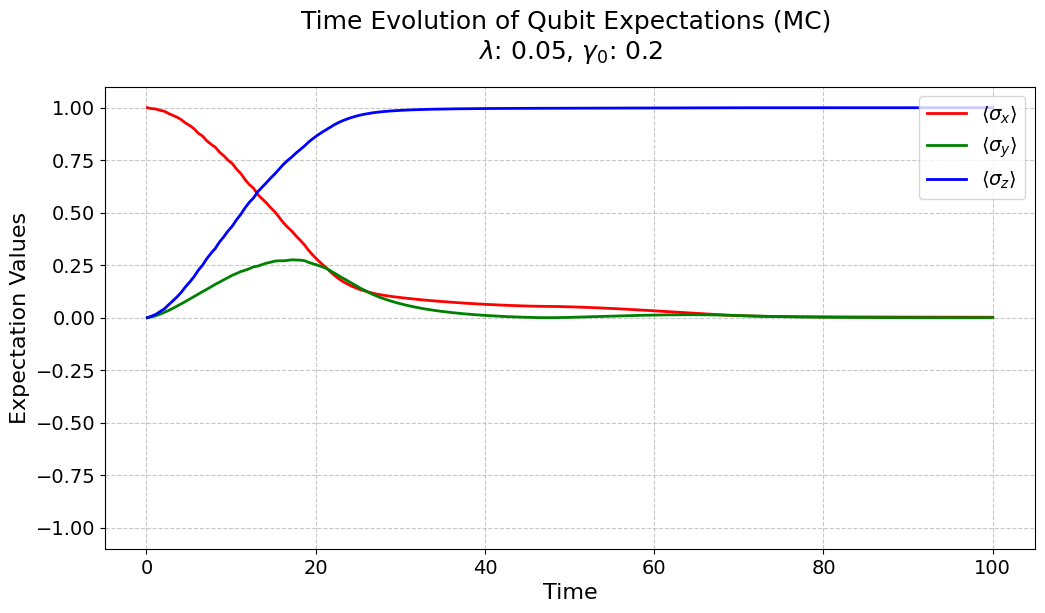

In [8]:
import matplotlib.pyplot as plt

data = mcsolve([[H0,s]], psi0, times, c_ops, e_ops, options = Options(store_states =True))
# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(data.times, data.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(data.times, data.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(data.times, data.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


Plotting Master Equation Solution


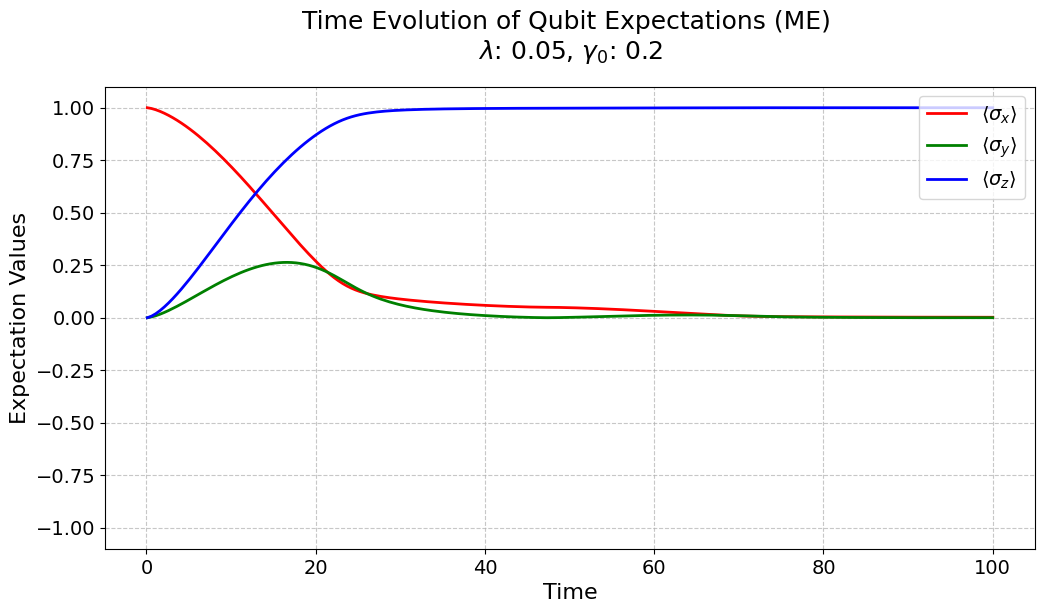

In [9]:
import matplotlib.pyplot as plt

# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(result2.times, result2.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


Plotting expectation values from Pre-calculated values from the Paper

## Formulas Used

### \( G(t) \)
The function \( G(t) \) is defined as:

$$ G(t) = e^{-\frac{\lambda}{2}t} \left( \cosh\left(\frac{\ell t}{2}\right) + \frac{\lambda}{\ell} \sinh\left(\frac{\ell t}{2}\right) \right) $$

where 

$$ \ell = \sqrt{\lambda^2 - 2\gamma_0\lambda} $$

### Initial State $$(\psi_0)$$
The initial state \(\psi_0\) is given by:

$$ \psi_0 = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) $$

### Density Matrix \(\rho\)
The density matrix \(\rho\) corresponding to \(\psi_0\) is:

$$ \rho = \ket{\psi_0}\bra{\psi_0} = \frac{1}{2} \begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix} $$

### Expectation Values
The expectation values of the Pauli matrices \(\sigma_x\), \(\sigma_y\), and \(\sigma_z\) are given by:

#### \(\langle \sigma_x \rangle\)
$$ \langle \sigma_x \rangle = 2 \, \text{Re} \left( \rho_{10} G(t) \right) $$

#### \(\langle \sigma_y \rangle\)
$$ \langle \sigma_y \rangle = -2 \, \text{Im} \left( \rho_{10} G(t) \right) $$

#### \(\langle \sigma_z \rangle\)
$$ \langle \sigma_z \rangle = 1 - 2 \rho_{11} \left| G(t) \right|^2 $$

or, equivalently,

$$ \langle \sigma_z \rangle = 1 - 2 \rho_{11} G(t)^2 $$


In [23]:
# Manually Solving 
lam = 0.1
gamma_0 = 0.5
def G(t):
    l = np.emath.sqrt(lam**2-2*gamma_0*lam)
    return np.exp(-(lam/2)*t)*(np.cosh((l*t)/2)+(lam/l)*np.sinh((l*t)/2))

# rho = 
psi0 = (basis(2, 0) + basis(2, 1)).unit() 

rho = ket2dm(psi0)
rho[0,0]

def rho_t(rho,t):
    rho = np.array(rho)
    rho.reshape(2,2)
    rho_00 = (1-G(t)**2)*rho[1,1] + rho[0,0]
    rho_01 = rho[0,1]*G(t) #I've to take conjugate Here! 
    rho_01 = rho[0,1]*np.conjugate(G(t))
    rho_10 = rho[1,0]*G(t)
    rho_11 = rho[1,1]*G(t)**2

    rho_1 = rho

    rho_1[0,0] = rho_00
    rho_1[0,1] = rho_01
    rho_1[1,0] = rho_10
    rho_1[1,1] = rho_11



    return rho_1


#operator_to_vector(rho)
def expec_x(rho,t): # rho is 2*2 matrix
    fuc = rho[1,0]*G(t)
    return 2*np.real(fuc)

def expec_y(rho,t): # rho is 2*2 matrix
    fuc = rho[1,0]*G(t)
    return -2*np.imag(fuc)

# def expec_z(rho,t): # rho is 2*2 matrix
#     if lam >= gamma_0:
#         fuc = 1 - 2*rho[1,1]*np.abs(G(t))**2

#     else:
#         l = np.sqrt(2*gamma_0*lam - lam**2)
#         mod = exp(-lam*t)*(np.cos(l*t/2)**2+((lam/l)*np.sin(l*t/2))**2)
#         fuc = 1 - 2*rho[1,1]*mod #2*rho[1,1]*mod - 1
#     return fuc
def expec_z(rho,t): # rho is 2*2 matrix
    fuc = 1 - 2*rho[1,1]*(G(t)**2)
    return fuc


print(rho_t(rho,10))

ValueError: cannot reshape array of size 1 into shape (2,2)

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cclab1\AppData\Local\Temp\ipykernel_14012\2935371923.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
C:\Users\cclab1\AppData\Local\Temp\ipykernel_14012\2935371923.py:18: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
c:\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python312\Lib\site-packages\matplotlib\cbook.py

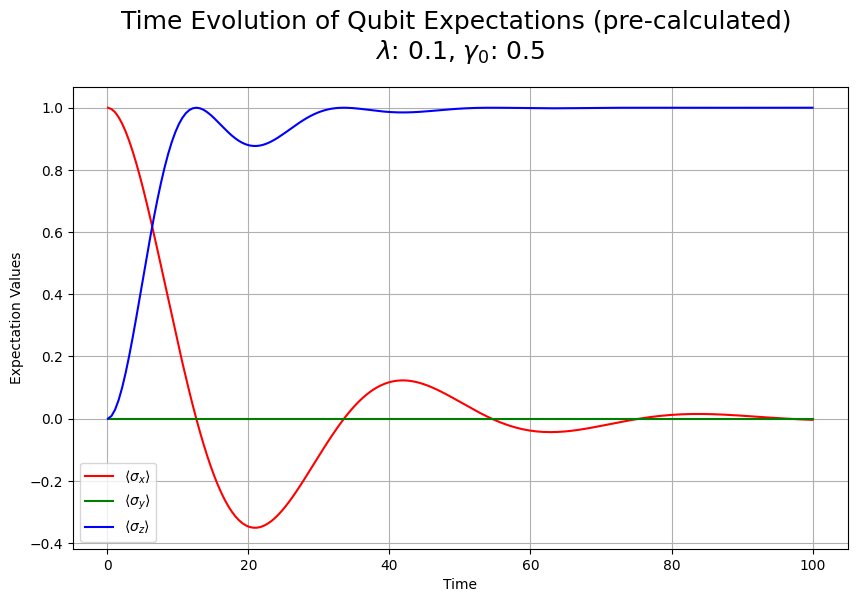

In [14]:
# Time array
time = np.linspace(0.1, 100, 200)

# Calculate expectation values
expec_x_vals = [expec_x(rho, t) for t in time]
expec_y_vals = [expec_y(rho, t) for t in time]
expec_z_vals = [expec_z(rho, t) for t in time]

expec_z_vals

# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Manually Solving 
lam = 1
gamma_0 = 5
def G(t):
    l = np.emath.sqrt(lam**2-2*gamma_0*lam)
    return np.exp(-(lam/2)*t)*(np.cosh((l*t)/2)+(lam/l)*np.sinh((l*t)/2))

# rho = 
psi0 = (basis(2, 0) + basis(2, 1)).unit() 

rho = ket2dm(psi0)
#operator_to_vector(rho)
def expec_x(rho,t): # rho is 2*2 matrix
    fuc = (rho[1,0]+rho[0,1])*G(t) 
    return fuc

def expec_y(rho,t): # rho is 2*2 matrix
    fuc = -1j*(rho[1,0]-rho[0,1])*G(t) 
    return fuc

# def expec_z(rho,t): # rho is 2*2 matrix
#     if lam >= gamma_0:
#         fuc = 1 - 2*rho[1,1]*np.abs(G(t))**2

#     else:
#         l = np.sqrt(2*gamma_0*lam - lam**2)
#         mod = exp(-lam*t)*(np.cos(l*t/2)**2+((lam/l)*np.sin(l*t/2))**2)
#         fuc = 1 - 2*rho[1,1]*mod #2*rho[1,1]*mod - 1
#     return fuc
def expec_z(rho,t): # rho is 2*2 matrix
    fuc = 1 - 2*rho[1,1]*(G(t)**2)
    return fuc


<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cclab1\AppData\Local\Temp\ipykernel_14012\281397621.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\cclab1\AppData\Local\Temp\ipykernel_14012\281397621.py:17: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


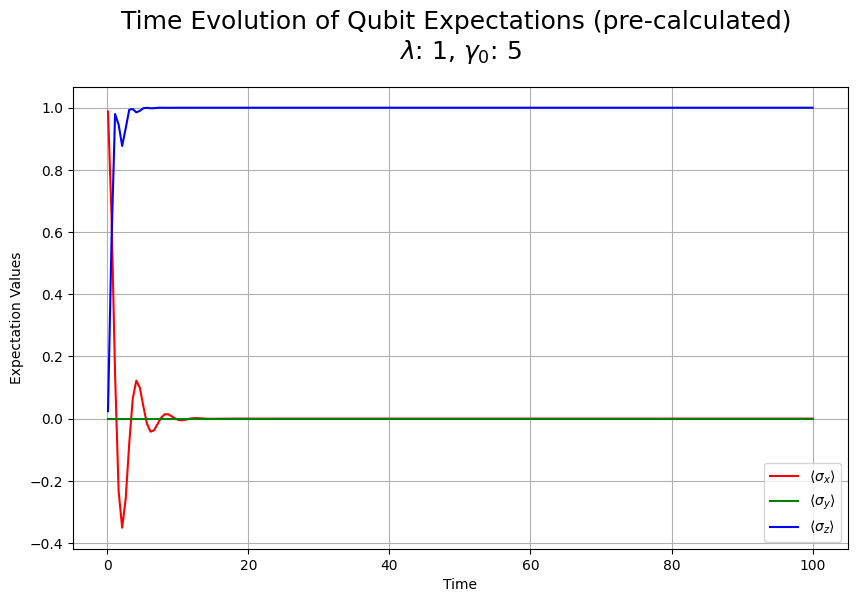

In [11]:
# Time array
time = np.linspace(0.1, 100, 200)

# Calculate expectation values
expec_x_vals = [expec_x(rho, t) for t in time]
expec_y_vals = [expec_y(rho, t) for t in time]
expec_z_vals = [expec_z(rho, t) for t in time]


# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()